In [ ]:
import pandas as pd
import torch
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/flipcart/flipcart82.csv')
df.head()

,product_id,review_id,title,review,likes,dislikes,ratings,reviewer
0,ECMB000001,ECMB0000010000001,Excellent,Wow superb I love it❤️ð battery backup so nice,740.0,160.0,5.0,Abhishek Saini
1,ECMB000001,ECMB0000010000002,Worth the money,Mobile So Good In Range Redmi 9a Has Miui 12 L...,355.0,104.0,4.0,Dinesh Kumar Sahni
2,ECMB000001,ECMB0000010000003,Just wow!,Wonderful device and smart phone best camera b...,125.0,47.0,5.0,Flipkart Customer
3,ECMB000001,ECMB0000010000004,Simply awesome,Very good mobile. Value for money. Battery bac...,0.0,0.0,5.0,Amit Sen
4,ECMB000001,ECMB0000010000005,Highly recommended,Really great.... value for money...,90.0,15.0,5.0,Sudeshna pakira


In [ ]:
df.tail()

,product_id,review_id,title,review,likes,dislikes,ratings,reviewer
53492,ECMB000082,ECMB0000820000286,Excellent,Very nice phone,0.0,0.0,5.0,Flipkart Customer
53493,ECMB000082,ECMB0000820000287,Wonderful,Amazing phone with great Performance..,0.0,0.0,5.0,Yusufi Master
53494,ECMB000082,ECMB0000820000288,Terrific,"There is some problems , sometimes keep restar...",0.0,0.0,5.0,Thajudheen E c
53495,ECMB000082,ECMB0000820000289,Expected a better product,Worthless photo not work properly.Don't buy th...,0.0,0.0,NaN,Jayhind Kumar Yadav
53496,ECMB000082,ECMB0000820000290,Waste of money!,I gifted this phone to my mother but there are...,0.0,0.0,NaN,Bhavya Gupta


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53497 entries, 0 to 53496
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   product_id  53497 non-null  object 
 1   review_id   53497 non-null  object 
 2   title       53497 non-null  object 
 3   review      53497 non-null  object 
 4   likes       53488 non-null  float64
 5   dislikes    53488 non-null  float64
 6   ratings     48483 non-null  float64
 7   reviewer    53488 non-null  object 
dtypes: float64(3), object(5)
memory usage: 3.3+ MB


<Figure size 1800x1440 with 0 Axes>

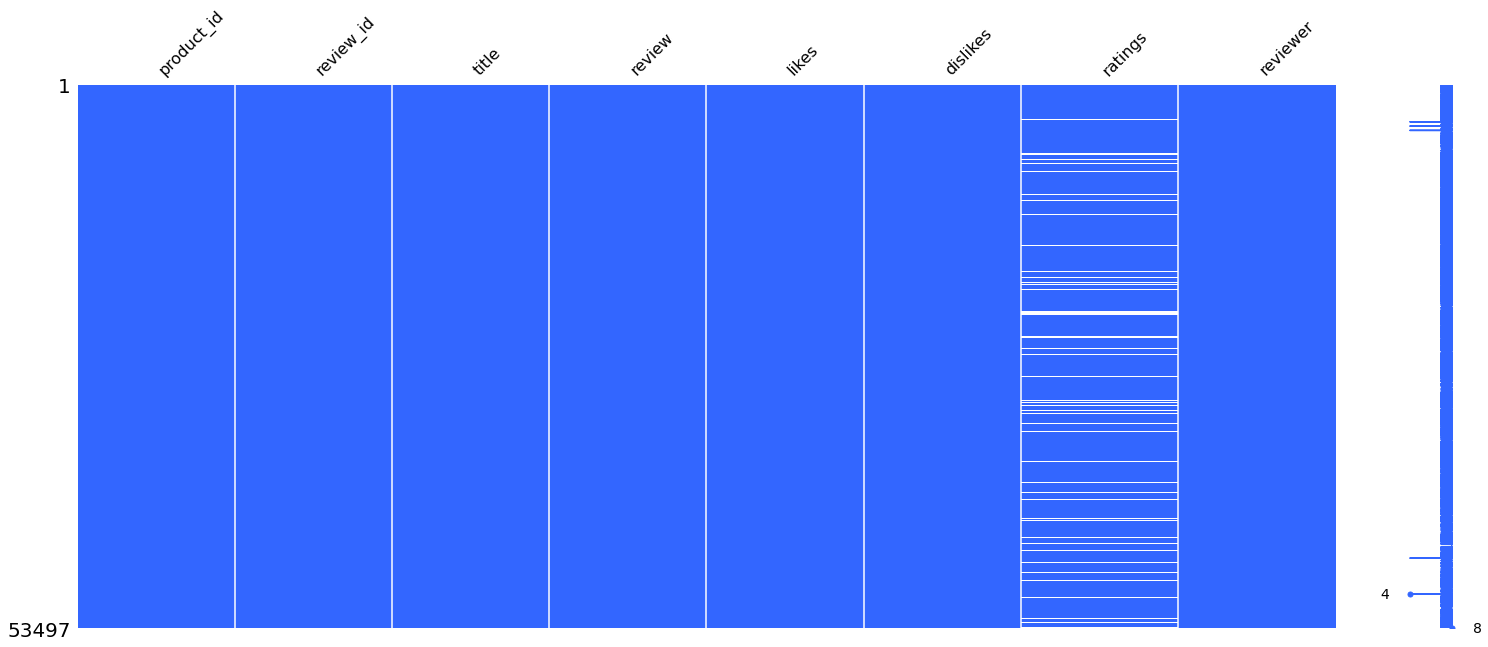

In [ ]:
import missingno as msno
plt.figure(figsize=(25, 20))
msno.matrix(df, color=[0.2, 0.4, 1])
plt.show()

In [ ]:
df.dropna(inplace=True, axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48483 entries, 0 to 53494
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   product_id  48483 non-null  object 
 1   review_id   48483 non-null  object 
 2   title       48483 non-null  object 
 3   review      48483 non-null  object 
 4   likes       48483 non-null  float64
 5   dislikes    48483 non-null  float64
 6   ratings     48483 non-null  float64
 7   reviewer    48483 non-null  object 
dtypes: float64(3), object(5)
memory usage: 3.3+ MB


<Figure size 1800x1440 with 0 Axes>

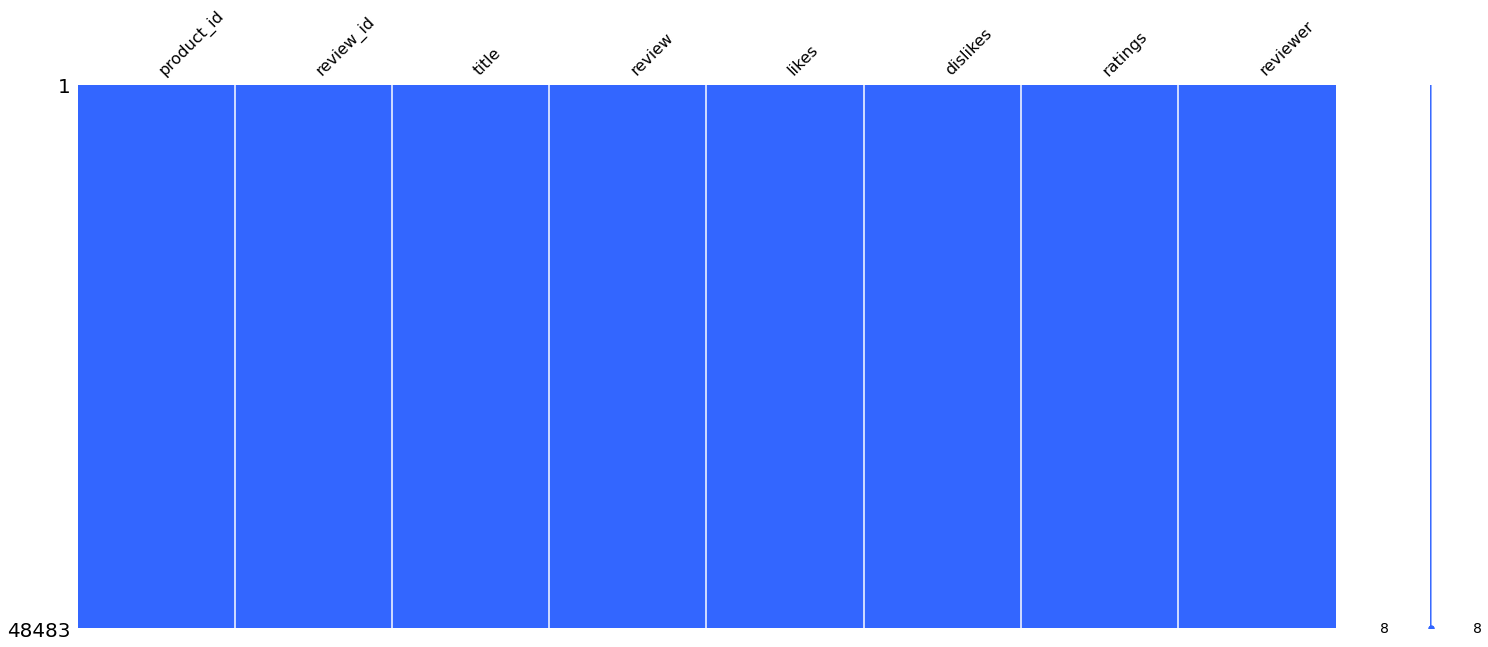

In [ ]:
import missingno as msno
plt.figure(figsize=(25, 20))
msno.matrix(df, color=[0.2, 0.4, 1])
plt.show()

In [ ]:
import re

def remove_url(text):
    text = re.sub(r"http\S+", "", text)
    return text

In [ ]:
sample = "ℍ𝕚 𝔼𝕧𝕖𝕣𝕪𝕠𝕟𝕖 𝕀 𝕒𝕞 𝔸𝕟𝕜𝕚𝕥 𝔾𝕦𝕡𝕥𝕒 𝕙𝕒𝕧𝕚𝕟𝕘 𝕥𝕙𝕖 𝕗𝕠𝕝𝕝𝕠𝕨𝕚𝕟𝕘 𝕂𝕒𝕘𝕘𝕝𝕖 𝕡𝕣𝕠𝕗𝕚𝕝𝕖 \n https://www.kaggle.com/nkitgupta 𝕒𝕟𝕕 𝕀 𝕒𝕞 😊 𝕥𝕠 𝕔𝕣𝕖𝕒𝕥𝕖 𝕥𝕙𝕚𝕤 𝕟𝕠𝕥𝕖𝕓𝕠𝕠𝕜"
print(f"Text before removing url:- \n {sample}")

sample = remove_url(sample)
print(f"Text after removing url:- \n {sample}")

Text before removing url:- 
 ℍ𝕚 𝔼𝕧𝕖𝕣𝕪𝕠𝕟𝕖 𝕀 𝕒𝕞 𝔸𝕟𝕜𝕚𝕥 𝔾𝕦𝕡𝕥𝕒 𝕙𝕒𝕧𝕚𝕟𝕘 𝕥𝕙𝕖 𝕗𝕠𝕝𝕝𝕠𝕨𝕚𝕟𝕘 𝕂𝕒𝕘𝕘𝕝𝕖 𝕡𝕣𝕠𝕗𝕚𝕝𝕖 
 https://www.kaggle.com/nkitgupta 𝕒𝕟𝕕 𝕀 𝕒𝕞 😊 𝕥𝕠 𝕔𝕣𝕖𝕒𝕥𝕖 𝕥𝕙𝕚𝕤 𝕟𝕠𝕥𝕖𝕓𝕠𝕠𝕜
Text after removing url:- 
 ℍ𝕚 𝔼𝕧𝕖𝕣𝕪𝕠𝕟𝕖 𝕀 𝕒𝕞 𝔸𝕟𝕜𝕚𝕥 𝔾𝕦𝕡𝕥𝕒 𝕙𝕒𝕧𝕚𝕟𝕘 𝕥𝕙𝕖 𝕗𝕠𝕝𝕝𝕠𝕨𝕚𝕟𝕘 𝕂𝕒𝕘𝕘𝕝𝕖 𝕡𝕣𝕠𝕗𝕚𝕝𝕖 
  𝕒𝕟𝕕 𝕀 𝕒𝕞 😊 𝕥𝕠 𝕔𝕣𝕖𝕒𝕥𝕖 𝕥𝕙𝕚𝕤 𝕟𝕠𝕥𝕖𝕓𝕠𝕠𝕜


In [ ]:
import unicodedata as uni

print(f"Text before Unicode Normalization:- \n {sample}")

sample = uni.normalize('NFKD', sample)
print(f"Text after Unicode Normalization:- \n {sample}")

Text before Unicode Normalization:- 
 ℍ𝕚 𝔼𝕧𝕖𝕣𝕪𝕠𝕟𝕖 𝕀 𝕒𝕞 𝔸𝕟𝕜𝕚𝕥 𝔾𝕦𝕡𝕥𝕒 𝕙𝕒𝕧𝕚𝕟𝕘 𝕥𝕙𝕖 𝕗𝕠𝕝𝕝𝕠𝕨𝕚𝕟𝕘 𝕂𝕒𝕘𝕘𝕝𝕖 𝕡𝕣𝕠𝕗𝕚𝕝𝕖 
  𝕒𝕟𝕕 𝕀 𝕒𝕞 😊 𝕥𝕠 𝕔𝕣𝕖𝕒𝕥𝕖 𝕥𝕙𝕚𝕤 𝕟𝕠𝕥𝕖𝕓𝕠𝕠𝕜
Text after Unicode Normalization:- 
 Hi Everyone I am Ankit Gupta having the following Kaggle profile 
  and I am 😊 to create this notebook


In [ ]:
!pip install demoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42 kB 1.4 MB/s 


In [ ]:
import demoji

def handle_emoji(string):
    emojis = demoji.findall(string)

    for emoji in emojis:
        string = string.replace(emoji, " " + emojis[emoji].split(":")[0])

    return string

print(f"Before Handling emoji:- \n {sample}")
print(f"After Handling emoji:- \n {handle_emoji(sample)}")   

Before Handling emoji:- 
 Hi Everyone I am Ankit Gupta having the following Kaggle profile 
  and I am 😊 to create this notebook
After Handling emoji:- 
 Hi Everyone I am Ankit Gupta having the following Kaggle profile 
  and I am  smiling face with smiling eyes to create this notebook


In [ ]:
!pip install pyspellchecker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 27.4 MB/s 


In [ ]:
from spellchecker import SpellChecker

spell = SpellChecker()

# # Add misspelled words to the list
misspelled_words = ["nsme", "mobiile", "phoone"]
print(f" Misspelled words before correction:- \n {misspelled_words}")
print(f" Misspelled words after correction")
for word in misspelled_words:
#     # Get the one `most likely` answer
    print(spell.correction(word))

 Misspelled words before correction:- 
 ['nsme', 'mobiile', 'phoone']
 Misspelled words after correction
name
mobile
phone


In [ ]:
def word_tokenizer(text):
    text = text.lower()
    text = text.split()

    return text

sample = "Hi Everyone I am Ankit Gupta."
print(sample)
print(word_tokenizer(sample))

Hi Everyone I am Ankit Gupta.
['hi', 'everyone', 'i', 'am', 'ankit', 'gupta.']


In [ ]:
stop_words = {"isn't", 'there', 'should', "that'll", "don't", 'am', 'its', 'been', 't', 'out', 'under', 'same', 'any', 'for', 'ain', 'won', 'between', 'have', 
          "you'd", 'only', 'your', 'who', 'shan', "you're", 'by', 'it', 'yourself', 'o', 'isn', "should've", 'to', 'were', 'can', 'his', 'an', 'we', 'her', 
          "you'll", 'into', 'such', 'very', 'shouldn', 'when', 'themselves', 'off', 'll', 'myself', "you've", 'nor', 'what', 'down', 'himself', 'does', 
          'mightn', 'yours', 'hers', 'while', 'wouldn', 'than', "wasn't", 'until', 've', 'do', 'didn', 'whom', 'needn', 'you', "aren't", 'm', 'him', 'each', 
          'are', 'will', 'again', 'them', 'doing', "needn't", 'had', 'she', 'the', "wouldn't", 'just', 'at', 'from', 'how', 'they', 'some', 'those', 'where', 
          'through', 'this', 'then', 'over', 'why', 'couldn', 'ourselves', 'hadn', 'which', 'further', 'now', 'ours', 'aren', 'be', 'hasn', 'other', 'above',
          'about', 'up', 'own', 'a', 'don', 'was', 'that', 'wasn', 's', "couldn't", "hasn't", 'their', 'all', 'because', 'being', 'has', 'theirs', 'and', 
          'too', 're', 'did', 'y', "hadn't", 'most', "haven't", 'below', 'before', "doesn't", 'in', 'once', 'weren', 'during', 'on', 'these', 'haven', 
          "weren't", 'against', 'of', "shan't", 'here', "mustn't", 'mustn', 'yourselves', 'our', 'if', 'my', "didn't", 'or', 'having', 'as', 'but', 'both', 
          "mightn't", "it's", 'herself', 'd', 'no', 'so', 'he', 'few', 'doesn', 'itself', 'me', 'ma', 'not', 'i', "she's", 'after', 'is', "shouldn't", 
          "won't", 'with', 'more'}

In [ ]:
def remove_stopwords(text):
    text = [word for word in text if word not in stop_words]
    return text

print(f"Before removing stopwords : {word_tokenizer(sample)}")
print(f"After removing stopwords : {remove_stopwords(word_tokenizer(sample))}") 

Before removing stopwords : ['hi', 'everyone', 'i', 'am', 'ankit', 'gupta.']
After removing stopwords : ['hi', 'everyone', 'ankit', 'gupta.']


In [ ]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer

stemmer = PorterStemmer()
# stemmer = LancasterStemmer()

def stemming(text):

    text = [stemmer.stem(word) for word in text]
    return text

sample = "I am creating a Notebook"
print(f"Before Stemming : {(sample)}")
print(f"After Stemming : {stemming(word_tokenizer(sample))}")

Before Stemming : I am creating a Notebook
After Stemming : ['i', 'am', 'creat', 'a', 'notebook']


In [ ]:
import spacy

sp = spacy.load("en_core_web_sm")

In [ ]:
def lemmatization(text):

    # text = [sp(word).lemma_ for word in text]

    text = " ".join(text)
    token = sp(text)

    text = [word.lemma_ for word in token]
    return text

print(f"Before Lemmatization : {word_tokenizer(sample)}")
print(f"After Lemmatization : {lemmatization(word_tokenizer(sample))}")

Before Lemmatization : ['i', 'am', 'creating', 'a', 'notebook']
After Lemmatization : ['I', 'be', 'create', 'a', 'notebook']


In [ ]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 27.3 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=2cba7cb33b8438b21d889f8858cf2d8e5d94978686e351e9b61b0f44c13cbe42
  Stored in directory: /root/.cache/pip/wheels/13/c7/b0/79f66658626032e78fc1a83103690ef6797d551cb22e56e734
Successfully built langdetect


In [ ]:
from langdetect import detect

en_text = u""""Hi Everyone I am Ankit Gupta."""
print(f" {en_text} : {detect(en_text)}")

hindi_text = u"""मेरा नाम अंकित गुप्ता है और मैं एक छात्र हूँ"""
print(f"{hindi_text} : {detect(hindi_text)}")

 "Hi Everyone I am Ankit Gupta. : tl
मेरा नाम अंकित गुप्ता है और मैं एक छात्र हूँ : hi


In [ ]:
df_temp = df.copy()
# Assigning labels to each review

def label(y):
    if y == 5:
        return 1
    elif y == 4:
        return 1
    else:
        return 0
    
from tqdm import tqdm

tqdm.pandas()

df_temp['y'] = df_temp.ratings.progress_map(label)

df_temp = df_temp[['review', 'y', 'ratings']]

df_temp.tail()

100%|██████████| 48483/48483 [00:00<00:00, 864365.86it/s]


,review,y,ratings
53487,Product is fine and durable.,1,4.0
53491,Nice,1,4.0
53492,Very nice phone,1,5.0
53493,Amazing phone with great Performance..,1,5.0
53494,"There is some problems , sometimes keep restar...",1,5.0


In [ ]:
df_temp.y.value_counts()

1    44746
0     3737
Name: y, dtype: int64

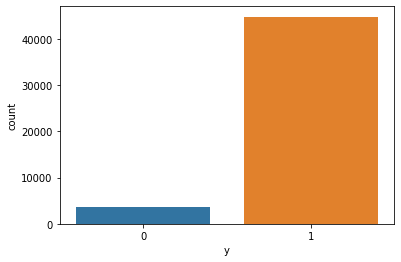

In [ ]:
import seaborn as sns

sns.countplot(x = "y", data = df_temp)
plt.show()

In [ ]:
df_temp2 = df_temp[(df_temp['ratings'] == 5)]
positive = list(df_temp2[(df_temp2['review'].str.len() > 100) & (df_temp2['review'].str.len() < 350)]['review'])
len(positive)

4803

In [ ]:
!pip install nlpaug 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 410 kB 35.1 MB/s 


In [ ]:
import nlpaug.augmenter.word as naw

In [ ]:
positive[41:49]

["An amazing smartphone for the price though i didn't like the colors compared to a realme phone in the same price range. It's a reall good second smartphone if you already have a primary device.",
 "Nice product according to its budget. But it's hard to play high Graphics games like pubg on 3GB RAM. It lags even when you play at Smooth Graphics settings. If this is for gaming (High graphics game) purpose, then don't go for 3GB or 2 GB RAM and the rest it works very well.",
 'I gave this phone to my wife as a gift and she loved it so much that she gets great performance and photos of games',
 'Every thing is great about the phone but a micro USB connector with a 5000 mah battery kind of suck a type c connector would have been better',
 'Very good handset at this price. Nice and great performance. Battery backup is also trustworthy. There is no issue till date after using for a period of 5days. Overall u can buy this phone without hesitation',
 'I am happy with your productus policy of 

In [ ]:
aug = naw.AntonymAug(name='Antonym_Aug', aug_min=1, aug_max=10, aug_p=0.3, lang='eng', stopwords=stop_words, tokenizer=None, 
                     reverse_tokenizer=None, stopwords_regex=None, verbose=0)
 
aug_negative = aug.augment(positive)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
len(aug_negative)

4803

In [ ]:
df_negative = pd.DataFrame({"review" : aug_negative, 'y' : [0]*len(aug_negative)})

df_positive = pd.DataFrame({"review" : positive, 'y' : [1]*len(positive)})

In [ ]:
df_temp = pd.concat([df_negative, df_positive]).sample(frac = 1, random_state = 11).reset_index(drop=True)
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9606 entries, 0 to 9605
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  9606 non-null   object
 1   y       9606 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 150.2+ KB


In [ ]:
df_temp.head()

,review,y
0,great phone in budget. .. pubg performance was...,0
1,Best Smartphone by Mi in this Range. . stay in...,0
2,Bad smooth phone. . and back camera quality is...,0
3,Thise is very nice mobile ...I like it very mu...,1
4,I m meagerly fall short of ð    All section...,0


In [ ]:
df = df_temp

In [ ]:
def preprocessing(text):
    
    text = remove_url(text) 
    text = uni.normalize('NFKD', text)
    text = handle_emoji(text)
    text = text.lower() 
    text = re.sub(r'[^\w\s]', '', text)
    text = word_tokenizer(text)
    # text = stemming(text)
    text = lemmatization(text)
    text = remove_stopwords(text)
    text = " ".join(text)

    return text

In [ ]:
from tqdm import tqdm

tqdm.pandas()
df['clean_review'] = df['review'].progress_map(preprocessing)

100%|██████████| 9606/9606 [01:54<00:00, 83.95it/s] 


In [ ]:
df.head()

,review,y,clean_review
0,great phone in budget. .. pubg performance was...,0,great phone budget pubg performance rough came...
1,Best Smartphone by Mi in this Range. . stay in...,0,good smartphone mi range stay place r confused...
2,Bad smooth phone. . and back camera quality is...,0,bad smooth phone back camera quality bad rear ...
3,Thise is very nice mobile ...I like it very mu...,1,thise nice mobile I like much delivery also fa...
4,I m meagerly fall short of ð    All section...,0,I meagerly fall short ð section r superb deliv...


In [ ]:
reviews = df.clean_review.values.tolist()

In [ ]:
from tqdm import tqdm

tqdm.pandas()
df['clean_review2'] = df['clean_review'].progress_map(word_tokenizer)

100%|██████████| 9606/9606 [00:00<00:00, 189418.65it/s]


In [ ]:
df.head()

,review,y,clean_review,clean_review2
0,great phone in budget. .. pubg performance was...,0,great phone budget pubg performance rough came...,"[great, phone, budget, pubg, performance, roug..."
1,Best Smartphone by Mi in this Range. . stay in...,0,good smartphone mi range stay place r confused...,"[good, smartphone, mi, range, stay, place, r, ..."
2,Bad smooth phone. . and back camera quality is...,0,bad smooth phone back camera quality bad rear ...,"[bad, smooth, phone, back, camera, quality, ba..."
3,Thise is very nice mobile ...I like it very mu...,1,thise nice mobile I like much delivery also fa...,"[thise, nice, mobile, i, like, much, delivery,..."
4,I m meagerly fall short of ð    All section...,0,I meagerly fall short ð section r superb deliv...,"[i, meagerly, fall, short, ð, section, r, supe..."


In [ ]:
data_words = df['clean_review2'].values.tolist()
len(data_words)

9606

In [ ]:
import gensim
data = list(df['clean_review'])

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['great', 'phone', 'budget', 'pubg', 'performance', 'rough', 'camera', 'worsen', 'worn', 'update', 'ni', 'mode', 'cam', 'aadde', 'phone', 'also', 'bad', 'stupid', 'phone']]


In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

/usr/local/lib/python3.8/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['great', 'phone', 'budget', 'pubg', 'performance', 'rough', 'camera', 'worsen', 'worn', 'update', 'ni', 'mode', 'cam', 'aadde', 'phone', 'also', 'bad', 'stupid', 'phone']


In [ ]:
import nltk
nltk.download('stopwords')

# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from gensim.utils import simple_preprocess
import spacy

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
#from spacy_download import load_spacy
#nlp = load_spacy("en_core_web_sm", exclude=["parser", "tagger"])  # Will download the model if it isn't installed yet
!python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 572 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
[['great', 'phone', 'budget', 'performance', 'rough', 'camera', 'worsen', 'wear', 'update', 'aadde', 'phone', 'also', 'bad', 'stupid', 'phone']]


In [ ]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 3), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)]]


In [ ]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('aadde', 1),
  ('also', 1),
  ('bad', 1),
  ('budget', 1),
  ('camera', 1),
  ('great', 1),
  ('performance', 1),
  ('phone', 3),
  ('rough', 1),
  ('stupid', 1),
  ('update', 1),
  ('wear', 1),
  ('worsen', 1)]]

In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=5,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
lda_model.save("/content/drive/MyDrive/flipcart/model_lda_105.model")

In [ ]:
# Load model
from gensim.models.ldamodel import LdaModel
lda = LdaModel.load("/content/drive/MyDrive/flipcart/model_lda_105.model")

In [ ]:
from pprint import pprint

# Print the Keyword in the 5 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.217*"good" + 0.041*"nice" + 0.038*"mobile" + 0.033*"look" + 0.029*"buy" + '
  '0.025*"love" + 0.024*"well" + 0.020*"work" + 0.016*"go" + 0.016*"charge"'),
 (1,
  '0.085*"camera" + 0.077*"phone" + 0.058*"battery" + 0.049*"bad" + '
  '0.044*"price" + 0.038*"evil" + 0.035*"performance" + 0.033*"quality" + '
  '0.033*"awesome" + 0.029*"also"'),
 (2,
  '0.092*"product" + 0.072*"flipkart" + 0.072*"thank" + 0.049*"delivery" + '
  '0.038*"mobile" + 0.036*"time" + 0.028*"super" + 0.025*"redmi" + 0.022*"mi" '
  '+ 0.021*"fast"'),
 (3,
  '0.040*"light" + 0.038*"ram" + 0.026*"result" + 0.024*"review" + '
  '0.018*"compare" + 0.018*"weight" + 0.017*"night" + 0.016*"variant" + '
  '0.016*"gb" + 0.015*"facility"'),
 (4,
  '0.096*"phone" + 0.046*"great" + 0.044*"use" + 0.039*"amazing" + '
  '0.027*"sell" + 0.026*"note" + 0.022*"really" + 0.021*"redmi" + '
  '0.019*"superb" + 0.019*"pro"')]


In [ ]:
!pip install enstop
from enstop import EnsembleTopics, PLSA


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from gensim.models.coherencemodel import CoherenceModel

# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.258182730851082

Coherence Score:  0.3569201673712129


In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 19.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=450a66717766d3aa703ee5b8b5b9a2a353cacaef4ccb504560aad780cf6595bd
  Stored in directory: /root/.cache/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=d66abddf50da9b63774eecfbb3f634e3e56ef6c65bd76d04565ad9fdd7b46f66
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built pyLDAvis sklearn


In [ ]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable
/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.284578 -0.037080       1        1  38.249977
4     -0.209446  0.126113       2        1  21.569541
0      0.104545 -0.328882       3        1  18.030756
2      0.179259  0.005709       4        1  14.986314
3      0.210221  0.234140       5        1   7.163413, topic_info=              Term         Freq        Total Category  logprob  loglift
67            good  6285.000000  6285.000000  Default  30.0000  30.0000
4           camera  5318.000000  5318.000000  Default  29.0000  29.0000
62         product  2218.000000  2218.000000  Default  28.0000  28.0000
7            phone  8167.000000  8167.000000  Default  27.0000  27.0000
51        flipkart  1741.000000  1741.000000  Default  26.0000  26.0000
44           thank  1721.000000  1721.000000  Default  25.0000  25.0000
48         battery  3595.000000  3595.000000  Default  24.0000  24.0000
2              bad  3012.000000  3012.000000  Default  23.0000  23.0000
5            great  1625.000000  1625.000000  Default  22.0000  22.0000
112            use  1531.000000  1531.000000  Default  21.0000  21.0000
187           evil  2350.000000  2350.000000  Default  20.0000  20.0000
36        delivery  1172.000000  1172.000000  Default  19.0000  19.0000
23           price  2741.000000  2741.000000  Default  18.0000  18.0000
105        amazing  1359.000000  1359.000000  Default  17.0000  17.0000
42            nice  1187.000000  1187.000000  Default  16.0000  16.0000
40          mobile  2372.000000  2372.000000  Default  15.0000  15.0000
6      performance  2197.000000  2197.000000  Default  14.0000  14.0000
31         quality  2066.000000  2066.000000  Default  13.0000  13.0000
244           time   876.000000   876.000000  Default  12.0000  12.0000
1             also  1799.000000  1799.000000  Default  11.0000  11.0000
16         display  1750.000000  1750.000000  Default  10.0000  10.0000
18            look   989.000000   989.000000  Default   9.0000   9.0000
46         awesome  2163.000000  2163.000000  Default   8.0000   8.0000
72             buy   836.000000   836.000000  Default   7.0000   7.0000
21            note   886.000000   886.000000  Default   6.0000   6.0000
30           money  1422.000000  1422.000000  Default   5.0000   5.0000
43           redmi  1364.000000  1364.000000  Default   4.0000   4.0000
384           sell  1018.000000  1018.000000  Default   3.0000   3.0000
403          super   673.000000   673.000000  Default   2.0000   2.0000
82           light   460.000000   460.000000  Default   1.0000   1.0000
2              bad  3012.084236  3012.843993   Topic1  -3.0144   0.9608
187           evil  2349.429427  2350.188739   Topic1  -3.2629   0.9607
35           value  1140.096803  1140.853841   Topic1  -3.9859   0.9604
30           money  1421.999186  1422.991462   Topic1  -3.7650   0.9603
145           back   899.179148   899.945141   Topic1  -4.2233   0.9602
22         overall   672.734494   673.492396   Topic1  -4.5134   0.9599
47          backup  1238.967081  1240.416272   Topic1  -3.9028   0.9599
16         display  1748.553264  1750.650338   Topic1  -3.5582   0.9598
81            life   622.771469   623.532923   Topic1  -4.5906   0.9598
41            much   515.259689   516.024514   Topic1  -4.7801   0.9595
176           play   436.203812   436.963975   Topic1  -4.9467   0.9593
237      processor   424.540296   425.299551   Topic1  -4.9738   0.9592
66           front   423.936585   424.700319   Topic1  -4.9752   0.9592
173          issue   411.937275   412.718601   Topic1  -5.0039   0.9591
249          cheap   361.007792   361.856114   Topic1  -5.1359   0.9587
297          sound   278.619571   279.376074   Topic1  -5.3949   0.9583
144        average   234.289510   235.044171   Topic1  -5.5682   0.9578
373          order   233.292742   234.064537   Topic1  -5.5725   0.9577
1             also  1793.283041  1799.316750   Topi

In [ ]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 3), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1)]


In [ ]:
from gensim.models import LdaMulticore
from gensim.models import LdaModel
from pprint import pprint

# number of topics
num_topics = 10
# Build LDA model
lda_model = LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics, iterations=400)


In [ ]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.049*"good" + 0.038*"product" + 0.030*"camera" + 0.020*"redmi" + '
  '0.017*"mobile" + 0.015*"performance" + 0.015*"phone" + 0.015*"like" + '
  '0.014*"flipkart" + 0.013*"price"'),
 (1,
  '0.041*"camera" + 0.033*"phone" + 0.029*"good" + 0.016*"awesome" + '
  '0.014*"evil" + 0.013*"quality" + 0.012*"display" + 0.011*"design" + '
  '0.010*"product" + 0.010*"performance"'),
 (2,
  '0.040*"phone" + 0.037*"good" + 0.032*"camera" + 0.025*"battery" + '
  '0.022*"price" + 0.021*"mobile" + 0.018*"awesome" + 0.015*"great" + '
  '0.014*"quality" + 0.012*"value"'),
 (3,
  '0.030*"phone" + 0.029*"flipkart" + 0.028*"bad" + 0.020*"delivery" + '
  '0.019*"camera" + 0.018*"evil" + 0.018*"mobile" + 0.018*"thank" + '
  '0.017*"battery" + 0.016*"good"'),
 (4,
  '0.072*"good" + 0.070*"phone" + 0.036*"camera" + 0.026*"battery" + '
  '0.018*"performance" + 0.017*"price" + 0.015*"display" + 0.014*"great" + '
  '0.013*"quality" + 0.012*"nice"'),
 (5,
  '0.037*"phone" + 0.030*"bad" + 0.026*"camera" + 0

In [ ]:
%%time
from gensim.models import FastText
fasttext_model = FastText(data_words, size=100, window=5, min_count=5, workers=4,sg=1)

/usr/local/lib/python3.8/dist-packages/gensim/models/fasttext.py:383: DeprecationWarning: Call to deprecated `bucket` (Attribute will be removed in 4.0.0, use trainables.bucket instead).
  self.wv.bucket = self.bucket
/usr/local/lib/python3.8/dist-packages/gensim/models/fasttext.py:522: DeprecationWarning: Call to deprecated `layer1_size` (Attribute will be removed in 4.0.0, use self.trainables.layer1_size instead).
  l1_size = self.layer1_size * np.dtype(np.float32).itemsize
/usr/local/lib/python3.8/dist-packages/gensim/models/fasttext.py:526: DeprecationWarning: Call to deprecated `bucket` (Attribute will be removed in 4.0.0, use trainables.bucket instead).
  num_buckets = self.bucket


CPU times: user 9.59 s, sys: 240 ms, total: 9.83 s
Wall time: 8.56 s


In [ ]:
fasttext_model.save("FastText-Model-For-ABSA.bin")

/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)


In [ ]:
fasttext_model.wv.n_similarity(['i like battery'],['battery'])

/usr/local/lib/python3.8/dist-packages/gensim/matutils.py:737: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.8/dist-packages/gensim/matutils.py:737: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link f

0.9737432

In [ ]:
aspects = ["phone", "camera", "battery", "delivery", "processor"]

def get_similarity(text, aspect):
    try:
        text = " ".join(text)
        return fasttext_model.wv.n_similarity([text], aspect)
    except:
        return 0

In [ ]:
from tqdm import tqdm
tqdm.pandas()
for aspect in aspects:
    df[aspect] = df['clean_review2'].progress_map(lambda text: get_similarity(text, aspect))

100%|██████████| 9606/9606 [00:04<00:00, 2267.65it/s]


In [ ]:
list_phone=[]
list_camera=[]
list_battery=[]
list_delivery=[]
list_processor=[]
for i in range(len(df['clean_review2'])):
    list_phone.append(fasttext_model.wv.n_similarity([aspects[0]], [" ".join(df['clean_review2'][i])]))
for i in range(len(df['clean_review2'])):
    list_camera.append(fasttext_model.wv.n_similarity([aspects[1]], [" ".join(df['clean_review2'][i])]))
for i in range(len(df['clean_review2'])):
    list_battery.append(fasttext_model.wv.n_similarity([aspects[2]], [" ".join(df['clean_review2'][i])]))
for i in range(len(df['clean_review2'])):
    list_delivery.append(fasttext_model.wv.n_similarity([aspects[3]], [" ".join(df['clean_review2'][i])]))
for i in range(len(df['clean_review2'])):
    list_processor.append(fasttext_model.wv.n_similarity([aspects[4]], [" ".join(df['clean_review2'][i])]))


In [ ]:
df['phone']=list_phone
df['camera']=list_camera
df['battery']=list_battery
df['delivery']=list_delivery
df['processor']=list_processor
df.head()

,review,y,clean_review,clean_review2,phone,camera,battery,delivery,processor
0,great phone in budget. .. pubg performance was...,0,great phone budget pubg performance rough came...,"[great, phone, budget, pubg, performance, roug...",0.819298,0.786063,0.697469,0.549153,0.716295
1,Best Smartphone by Mi in this Range. . be born...,0,good smartphone mi range bear r confused samsu...,"[good, smartphone, mi, range, bear, r, confuse...",0.785190,0.765837,0.675267,0.511048,0.735276
2,Bad smooth phone. . and back camera quality is...,0,bad smooth phone back camera quality bad rear ...,"[bad, smooth, phone, back, camera, quality, ba...",0.745465,0.873688,0.746824,0.524248,0.759978
3,Thise is very nice mobile ...I like it very mu...,1,thise nice mobile I like much delivery also fa...,"[thise, nice, mobile, i, like, much, delivery,...",0.601381,0.526910,0.559432,0.869267,0.541614
4,I m meagerly fall short of ð    All section...,0,I meagerly fall short ð section r superb deliv...,"[i, meagerly, fall, short, ð, section, r, supe...",0.657974,0.680476,0.721474,0.820168,0.618131


In [ ]:
##Model

In [ ]:
import torch
from torch import nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import RandomSampler
import warnings

In [ ]:
class config:
    warnings.filterwarnings("ignore", category = UserWarning)
    IMG_SIZE = (224,224)
    DEVICE = ("cuda" if torch.cuda.is_available() else "cpu")
    FOLDS = 5
    SHUFFLE = True
    BATCH_SIZE = 32
    LR = 0.01
    EPOCHS = 30
    EMB_DIM = 100
    MAX_LEN = 20
    MODEL_PATH = "/content/drive/MyDrive/flipcart/MyModel.pt"

In [ ]:
class Vocabulary:
  
    '''
    __init__ method is called by default as soon as an object of this class is initiated
    we use this method to initiate our vocab dictionaries
    '''
    def __init__(self, freq_threshold, max_size):
        '''
        freq_threshold : the minimum times a word must occur in corpus to be treated in vocab
        max_size : max source vocab size. Eg. if set to 10,000, we pick the top 10,000 most frequent words and discard others
        '''
        #initiate the index to token dict
        ## <PAD> -> padding, used for padding the shorter sentences in a batch to match the length of longest sentence in the batch
        ## <SOS> -> start token, added in front of each sentence to signify the start of sentence
        ## <EOS> -> End of sentence token, added to the end of each sentence to signify the end of sentence
        ## <UNK> -> words which are not found in the vocab are replace by this token
        self.itos = {0: '<PAD>', 1:'<SOS>', 2:'<EOS>', 3: '<UNK>'}
        #initiate the token to index dict
        self.stoi = {k:j for j,k in self.itos.items()} 
        self.freq_threshold = freq_threshold
        self.max_size = max_size
    
    '''
    __len__ is used by dataloader later to create batches
    '''
    def __len__(self):
        return len(self.itos)
    
    '''
    a simple tokenizer to split on space and converts the sentence to list of words
    '''
    @staticmethod
    def tokenizer(text):
        return [tok.lower().strip() for tok in text.split(' ')]
    def build_vocabulary(self, sentence_list):
            #calculate the frequencies of each word first to remove the words with freq < freq_threshold
              frequencies = {}  #init the freq dict
              idx = 4 #index from which we want our dict to start. We already used 4 indexes for pad, start, end, unk
              
              #calculate freq of words
              for sentence in sentence_list:
                  for word in self.tokenizer(sentence):
                      if word not in frequencies.keys():
                          frequencies[word]=1
                      else:
                          frequencies[word]+=1
                          
                          
              #limit vocab by removing low freq words
              frequencies = {k:v for k,v in frequencies.items() if v>self.freq_threshold} 
              
              #limit vocab to the max_size specified
              frequencies = dict(sorted(frequencies.items(), key = lambda x: -x[1])[:self.max_size-idx]) # idx =4 for pad, start, end , unk
                
            #create vocab
              for word in frequencies.keys():
                  self.stoi[word] = idx
                  self.itos[idx] = word
                  idx+=1
              
     
    '''
    convert the list of words to a list of corresponding indexes
    '''    
    def numericalize(self, text):
      #tokenize text
        tokenized_text = self.tokenizer(text)
        numericalized_text = []
        for token in tokenized_text:
            if token in self.stoi.keys():
                numericalized_text.append(self.stoi[token])
            else: #out-of-vocab words are represented by UNK token index
                numericalized_text.append(self.stoi['<UNK>'])
                
        return numericalized_text


In [ ]:
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    '''
    Initiating Variables
    df: the training dataframe
    source_column : the name of source text column in the dataframe
    transform : If we want to add any augmentation
    freq_threshold : the minimum times a word must occur in corpus to be treated in vocab
    source_vocab_max_size : max source vocab size
    '''
    
    def __init__(self, df, source_column,freq_threshold = 3,
                source_vocab_max_size = 10000 , transform=None):
    
        self.df = df
        self.transform = transform
        
        #get source and target texts
        self.source_texts = self.df[source_column]
        
        
        ##VOCAB class has been created above
        #Initialize source vocab object and build vocabulary
        self.source_vocab = Vocabulary(freq_threshold, source_vocab_max_size)
        self.source_vocab.build_vocabulary(self.source_texts.tolist())

        
    def __len__(self):
        return len(self.df)
    
    '''
    __getitem__ runs on 1 example at a time. Here, we get an example at index and return its numericalize source and
    target values using the vocabulary objects we created in __init__
    '''
    def __getitem__(self, index):
        source_text = self.source_texts[index]
        
        if self.transform is not None:
            source_text = self.transform(source_text)
            
        #numericalize texts ['<SOS>','cat', 'in', 'a', 'bag','<EOS>'] -> [1,12,2,9,24,2]
        numerialized_source = [self.source_vocab.stoi["<SOS>"]]
        numerialized_source += self.source_vocab.numericalize(source_text)
        numerialized_source.append(self.source_vocab.stoi["<EOS>"])
        
        #convert the list to tensor and return
        return torch.tensor(numerialized_source), torch.tensor(self.df.y[index])

In [ ]:
!pip install Vocabulary

In [ ]:
dataset = CustomDataset(df, "clean_review")

In [ ]:
import pickle

with open('dataset-new', 'wb') as dataset_file:
 
  # Step 3
    pickle.dump(dataset, dataset_file, pickle.HIGHEST_PROTOCOL)

# import pickle
 
# # Step 2
# with open('./dataset', 'rb') as config_dictionary_file:
 
#     # Step 3
#     config_dictionary = pickle.load(config_dictionary_file)
 
#     # After config_dictionary is read from file
#     print(config_dictionary)

In [ ]:
print(list(dataset.source_vocab.stoi))

['<PAD>', '<SOS>', '<EOS>', '<UNK>', 'phone', 'i', 'good', 'camera', 'battery', 'bad', 'price', 'evil', 'product', 'mobile', 'performance', 'awesome', 'flipkart', 'quality', 'thank', 'great', 'also', 'display', 'redmi', 'use', 'money', 'nice', 'delivery', 'range', 'like', 'value', 'fast', 'one', 'excellent', 'day', 'mi', 'really', 'amazing', 'backup', 'look', 'ð', 'buy', 'budget', 'nasty', 'back', 'sell', 'note', 'gb', 'well', 'time', 'feature', 'overall', 'superb', 'love', 'super', '5', '2', 'pro', 'worth', 'hate', 'u', 'work', '4', 'life', 'design', 'get', 'pubg', 'go', 'game', '3', 'ram', 'play', '1', 'processor', 'much', 'take', 'happy', '7', 'high', 'light', 'screen', 'low', 'unhappy', 'red', 'thing', '10', 'charge', 'smartphone', 'recommend', 'device', 'xiaomi', 'say', 'little', 'immobile', 'service', 'everything', 'heart', 'slow', 'purchase', 'month', 'give', 'feel', 'colour', 'sound', 'front', 'first', '6', 'want', 'badly', 'experience', 'build', 'deliver', '8', 'lag', 'smooth'

In [ ]:
def get_emb_layer_with_weights(target_vocab, emb_model, trainable = False):

    weights_matrix = np.zeros((len(target_vocab), config.EMB_DIM))
    words_found = 0
    
    for i, word in enumerate(target_vocab):
        weights_matrix[i] = np.concatenate([emb_model.wv[word]])
        words_found += 1
                
    print(f"Words found are : {words_found}")
    
    weights_matrix = torch.tensor(weights_matrix, dtype = torch.float32).reshape(len(target_vocab), config.EMB_DIM)
    emb_layer = nn.Embedding.from_pretrained(weights_matrix)
    print(emb_layer)
    if trainable:
        emb_layer.weight.requires_grad = True
    else:
        emb_layer.weight.requires_grad = False

    return emb_layer


In [ ]:
class MyCollate:
    def __init__(self, pad_idx, maxlen):
        self.pad_idx = pad_idx
        self.maxlen = maxlen
        
    
    #__call__: a default method
    ##   First the obj is created using MyCollate(pad_idx) in data loader
    ##   Then if obj(batch) is called -> __call__ runs by default
    def __call__(self, batch):
        #get all source indexed sentences of the batch
        source = [item[0] for item in batch] 
        #pad them using pad_sequence method from pytorch. 
#         source = pad_sequence(source, batch_first=False, padding_value = self.pad_idx)
        
        padded_sequence = torch.zeros((self.maxlen, len(batch)), dtype = torch.int)
        
        for idx, text in enumerate(source):
            
            if len(text) > self.maxlen:
                padded_sequence[:, idx] = source[idx][: self.maxlen]
            else:
                padded_sequence[:len(source[idx]), idx] = padded_sequence[:len(source[idx]), idx] + source[idx]
                
        
        #get all target indexed sentences of the batch
        target = [item[1] for item in batch] 
        
        target = torch.tensor(target, dtype = torch.float32).reshape(-1)
        return padded_sequence, target


In [ ]:
class Model(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim, embedding_layer):
        super().__init__()
#         self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.hidden_dim = hidden_dim
        self.embedding = embedding_layer
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, bidirectional = True)
        self.fc1 = nn.Linear(2*hidden_dim, 128)
        self.fc2 = nn.Linear(128, output_dim)
        self.dropout = nn.Dropout(0.3)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, text):
        
        max_len, N = text.shape
        hidden = torch.zeros((2, N , self.hidden_dim),
                          dtype=torch.float)
        memory = torch.zeros((2, N , self.hidden_dim),
                          dtype=torch.float)
        hidden = hidden.to(config.DEVICE)
        memory = memory.to(config.DEVICE)
        embedded = self.embedding(text)
        output, hidden = self.lstm(embedded, (hidden, memory))
#         assert torch.equal(output[-1,:,:], hidden.squeeze(0))
        y_pred = output[-1,:,:]
        y_pred = self.fc1(y_pred)
        y_pred = self.fc2(y_pred)
        y_pred = self.sigmoid(y_pred)
                         
        return y_pred  
  

In [ ]:
def train_epochs(dataloader,model, loss_fn, optimizer):
    train_correct = 0
    train_loss = 0
    
    model.train()

    for review, label in tqdm(dataloader):
        
        review, label = review.to(config.DEVICE), label.to(config.DEVICE)
        optimizer.zero_grad()
        output = model(review)
        output = output.reshape(-1)
        loss = loss_fn(output, label)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()*review.size(1)
        prediction = (output > 0.5).float()
        train_correct += (prediction == label).float().sum()
        
    return train_loss, train_correct

        

In [ ]:
def val_epochs(dataloader, model, loss_fn):
    val_correct = 0
    val_loss = 0
    
    model.eval()
#     hidden = model.init_hidden(config.BATCH_SIZE)

    for review, label in dataloader:
        
        review, label = review.to(config.DEVICE), label.to(config.DEVICE)
        
        output = model(review)
        output = output.reshape(-1)

        loss = loss_fn(output, label)
        
        val_loss += loss.item()*review.size(1)
        prediction = (output > 0.5).float()
        val_correct += (prediction == label).float().sum()
#         prediction = 
    return val_loss, val_correct


In [ ]:
#fasttext_model.train((dataset),total_examples=10,epochs=10)

In [ ]:

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from torch.utils.data import SubsetRandomSampler
from torch.optim import Adam
from tqdm import tqdm
from torch.utils.data import DataLoader 
import matplotlib.pyplot as plt


# sfk = StratifiedKFold(n_splits = config.FOLDS)
kfold = KFold(n_splits = config.FOLDS)
model_state_dicts = {}

for fold, (train_idx, val_idx) in enumerate(kfold.split(np.arange(len(dataset)))):
    
    train_sampler = SubsetRandomSampler(train_idx)
    val_sampler = SubsetRandomSampler(val_idx)
    
    train_loader = DataLoader(dataset, batch_size = config.BATCH_SIZE, sampler = train_sampler, collate_fn = MyCollate(0, config.MAX_LEN))
    val_loader = DataLoader(dataset, batch_size = config.BATCH_SIZE, sampler = val_sampler, collate_fn = MyCollate(0, config.MAX_LEN))  
    
    VOCAB_SIZE = len(dataset.source_vocab)
    HIDDEN_DIM = 128
    OUTPUT_DIM = 1
    VOCAB = list(dataset.source_vocab.stoi)
    
    embedding_layer = get_emb_layer_with_weights(target_vocab = VOCAB, emb_model = fasttext_model, trainable = False)

    model = Model(VOCAB_SIZE, config.EMB_DIM, HIDDEN_DIM, OUTPUT_DIM, embedding_layer)
    model = model.to(config.DEVICE)
    
#     model
#     model = Model(2, len(dataset.source_vocab), 128, 100, 1 ).to(config.DEVICE)
#     hidden = model.init_hidden(config.BATCH_SIZE)
#     model.hidden = hidden

    loss_fn = nn.BCELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)
    
    train_losses = []
    val_losses = []
    train_accs = []
    val_accs = []

    print(f"-----------------------------------------------------------{fold}-fold of the model-----------------------------------------------------------")
    for epoch in range(config.EPOCHS):
        train_loss, train_correct = train_epochs(train_loader, model, loss_fn, optimizer)
        val_loss, val_correct = val_epochs(val_loader, model, loss_fn)  
        
        train_loss = train_loss/len(train_loader.sampler)
        val_loss = val_loss/len(val_loader.sampler)
        train_acc = (train_correct/len(train_loader.sampler))*100
        val_acc = (val_correct/len(val_loader.sampler))*100
        
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accs.append(train_acc.cpu().numpy().tolist())
        val_accs.append(val_acc.cpu().numpy().tolist())
        
        print(f"| Train Loss : {train_loss} |", end = " ")
        print(f" Val Loss : {val_loss} |", end = " ")
        print(f"Train Acc : {train_acc} |", end = " ")
        print(f"Val Acc : {val_acc} |")

        
    # Saving the state dicts for the model
    model_state_dicts.update({f"LSTM-Model-for-{fold}" : model.state_dict(),
                             f"Model-Optimizer-for-{fold}" : optimizer.state_dict()})
    # Saving the state dicts for the model
    model_state_dicts.update({f"LSTM-Model-for-{fold}" : model.state_dict(),
                             f"Model-Optimizer-for-{fold}" : optimizer.state_dict()})
    
#     # summarize history for accuracy
#     plt.plot(train_accs)
#     plt.plot(val_accs)
#     plt.title('Model Accuracy')
#     plt.ylabel('Accuracy')
#     plt.xlabel('Epoch')
#     plt.legend(['Train', 'Test'], loc='upper left')
#     plt.show()
#     # summarize history for loss
#     plt.plot(train_losses)
#     plt.plot(val_losses)
#     plt.title('Model Loss')
#     plt.ylabel('Loss')
#     plt.xlabel('Epoch')
#     plt.legend(['Train', 'Test'], loc='upper left')
#     plt.show()


In [ ]:
torch.save(model_state_dicts, "My-Model.pt")

In [ ]:
def numericalize(text):
    
    numerialized_source = [] 
    numerialized_source = [dataset.source_vocab.stoi["<SOS>"]]
    numerialized_source += dataset.source_vocab.numericalize(text)
    numerialized_source.append(dataset.source_vocab.stoi["<EOS>"])
    
    return numerialized_source

def padding(source):
    padded_sequence = torch.zeros(config.MAX_LEN, 1, dtype = torch.int)
    source = torch.tensor(source)
    
    if len(source) > config.MAX_LEN:
        padded_sequence[:, 0] = source[: config.MAX_LEN]
    else:
        padded_sequence[:len(source), 0] = padded_sequence[:len(source), 0] + source
    
    return padded_sequence


In [ ]:
def infer_processing(text):
    
    text = preprocessing(text)
    text = numericalize(text)
    text = padding(text)
    return text

In [ ]:
aspects = ["phone", "camera", "battery", "neutral", "processor"]

def get_similarity(text, aspect):
    try:
#         text = " ".join(text)
        return fasttext_model.wv.n_similarity(text, aspect)
    except:
        return 0
    
def best_aspect(text, aspects):
    a = []
    
    for aspect in aspects:
        a.append(get_similarity(text, aspect))
    
    return aspects[np.argmax(a)]

In [ ]:
sample = "I am really impressed with the phone's great battery backup."

ba = best_aspect(preprocessing(sample), aspects)

a = infer_processing(sample).to(config.DEVICE)

In [ ]:
model.eval()
sentiment = model(a)
sentiment = sentiment.cpu().detach().numpy()[0]

if sentiment > 0.5:
    sentiment = 'Positively'
else :
    sentiment = 'Negatively'

In [ ]:
print(f"The reviewer is talking {sentiment} about the {ba} of the phone in his/her comment")